In [ ]:
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving 3d_shape_points_data.npz to 3d_shape_points_data.npz
Uploaded file: 3d_shape_points_data.npz


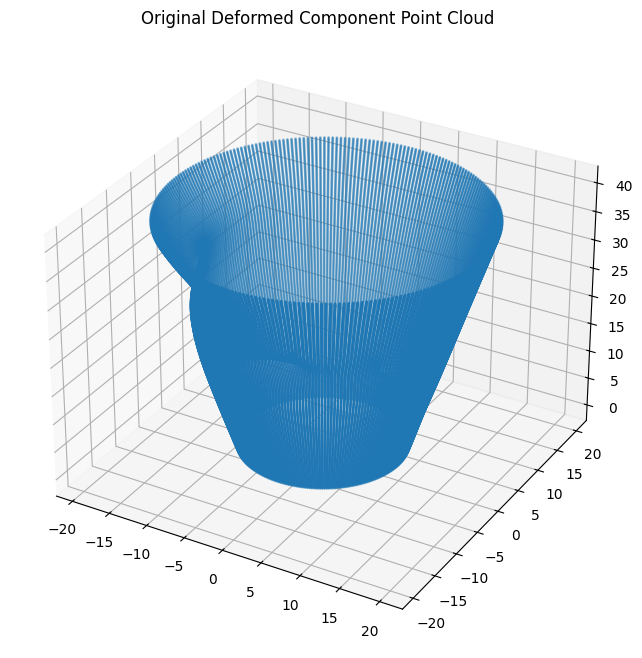

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# data loading
data = np.load(file_name)
points = data['points']

#visualisation of the original
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)
ax.set_title('Original')
plt.show()

assuming it was a cylinder , so it will mean it will have a dominant axis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(points)

axis_direction = pca.components_[0]
mean_point = np.mean(points, axis=0)

In [ ]:
from scipy.optimize import least_squares

def cylinder_residuals(params, points):
    x0, y0, z0, dx, dy, dz, radius = params
    axis_point = np.array([x0, y0, z0])
    axis_dir = np.array([dx, dy, dz])
    axis_dir /= np.linalg.norm(axis_dir)

    vectors = points - axis_point
    projections = np.dot(vectors, axis_dir)
    closest_points = axis_point + np.outer(projections, axis_dir)
    distances = np.linalg.norm(points - closest_points, axis=1)

    return distances - radius


initial_params = np.hstack([mean_point, axis_direction, np.median(np.linalg.norm(points - mean_point, axis=1))])
res = least_squares(cylinder_residuals, initial_params, args=(points,))
fitted_params = res.x

x0, y0, z0, dx, dy, dz, fitted_radius = fitted_params
axis_point = np.array([x0, y0, z0])
axis_dir = np.array([dx, dy, dz])
axis_dir /= np.linalg.norm(axis_dir)

In [ ]:
corrected_points = []
for p in points:
    vector = p - axis_point
    projection = np.dot(vector, axis_dir)
    projected_point = axis_point + projection * axis_dir
    radial_vector = p - projected_point
    corrected_point = projected_point + (fitted_radius / np.linalg.norm(radial_vector)) * radial_vector
    corrected_points.append(corrected_point)

corrected_points = np.array(corrected_points)

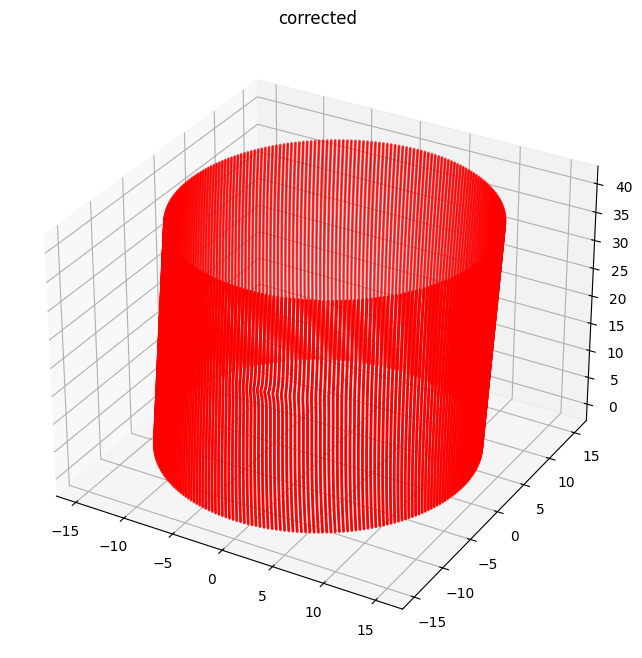

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(corrected_points[:, 0], corrected_points[:, 1], corrected_points[:, 2], s=1, color='r')
ax.set_title('corrected')
plt.show()